## Research Paper Link
http://conteudo.icmc.usp.br/pessoas/gbatista/files/iicai2009.pdf
https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/tsmcb09.pdf
## Imblearn library
https://imbalanced-learn.readthedocs.io/en/stable/over_sampling.html#from-random-over-sampling-to-smote-and-adasyn


!pip install -U imbalanced-learn

In [6]:
from sklearn.datasets import make_classification 

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import KFold, train_test_split 
import numpy as np 
from sklearn.ensemble import RandomForestClassifier
from collections import Counter 
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours, RepeatedEditedNearestNeighbours, TomekLinks 
from imblearn.over_sampling import RandomOverSampler, SMOTE 
from imblearn.combine import SMOTEENN, SMOTETomek 
from imblearn.ensemble import BalanceCascade, EasyEnsemble, BalancedBaggingClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
import pandas as pd
warnings.filterwarnings('ignore') 
from sklearn.decomposition import PCA
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
# Generate data with two classes
X, y = make_classification(class_sep=1.2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, n_features=5,
                            n_clusters_per_class=1, n_samples=10000,flip_y=0, random_state=10) 
pca= PCA(n_components=2) 
X = pca.fit_transform(X) 
y = y.astype('str') 
y[y=='1'] ='L'
y[y=='0'] ='S' 
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=0) 
X_1, X_2=X_train[y_train=='S'], X_train[y_train=='L']

In [3]:
X_train.shape,X_test.shape

((7000, 2), (3000, 2))

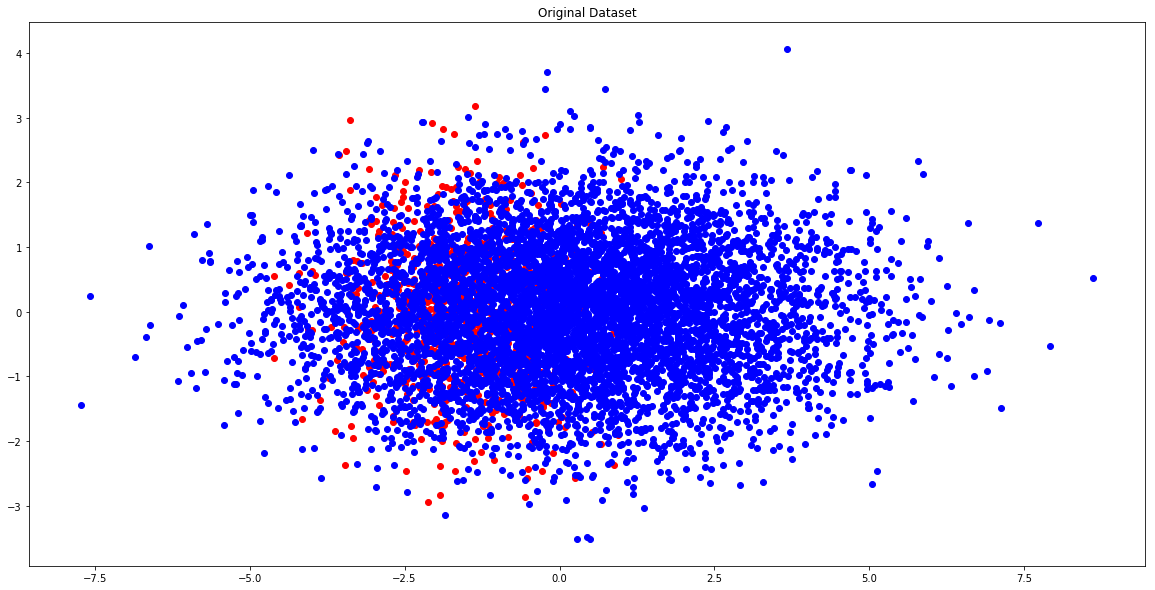

In [4]:
# Scatter plot of the data 
fig= plt.figure(figsize=(20,10))
plt.scatter(X_1[:,0],X_1[:,1],color='red') 
plt.scatter(X_2[:,0],X_2[:,1],color='blue')


plt.title("Original Dataset") 
plt.show()

In [5]:
# Fit a Logistic Regression model 
def simple_classification(X_train,y_train,X_test,y_test):
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3),
          'penalty':['l1','l2']} 
    cv=KFold(n_splits=3, shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train,y_train)
    res=classification_report(y_test,clf.predict(X_test))
    print('simple_logistic_classification')
    print(classification_report(y_test,clf.predict(X_test)))
    print(confusion_matrix(y_test,clf.predict(X_test)))

In [6]:
simple_classification(X_train,y_train,X_test,y_test)

simple_logistic_classification
              precision    recall  f1-score   support

           L       0.89      1.00      0.94      2679
           S       0.00      0.00      0.00       321

   micro avg       0.89      0.89      0.89      3000
   macro avg       0.45      0.50      0.47      3000
weighted avg       0.80      0.89      0.84      3000

[[2679    0]
 [ 321    0]]


In [9]:
def wieghtedlogreg(X_train,y_train,X_test,y_test):
    clf_base =LogisticRegression() 
    grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight':['balanced']} 
    cv= KFold(n_splits=5,shuffle=True,random_state=0) 
    clf=GridSearchCV(clf_base, grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train,y_train)
    print('wieghtedlogreg')
    y_pred=clf.predict(X_test)
    y_pred_on_train=clf.predict(X_train)
    print(classification_report(y_test,clf.predict(X_test))) 
    print(confusion_matrix(y_test,clf.predict(X_test)))
    print(confusion_matrix(y_train,clf.predict(X_train)))

In [10]:
wieghtedlogreg(X_train,y_train,X_test,y_test)

wieghtedlogreg
              precision    recall  f1-score   support

           L       0.96      0.66      0.79      2679
           S       0.22      0.77      0.34       321

   micro avg       0.68      0.68      0.68      3000
   macro avg       0.59      0.72      0.56      3000
weighted avg       0.88      0.68      0.74      3000

[[1781  898]
 [  73  248]]
[[4217 2104]
 [ 165  514]]


In [172]:
#Random undersampling of majority class 
def Random_underSampling(X_train,y_train,X_test,y_test):
    us= RandomUnderSampler(ratio=0.6, random_state=1) 
    X_train_res,y_train_res=us.fit_sample(X_train,y_train) 
    print('Random_underSampling')
    print("Distribution of class labels before resampling {}".format(Counter(y_train)))
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res)))
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3),'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    print(confusion_matrix(y_test,clf.predict(X_test)))
    print(classification_report(y_test,clf.predict(X_test))) 
    print()
    return(clf.predict(X_test))

In [ ]:
Random_underSampling(X_train,y_train,X_test,y_test)

# Near Miss 1 
#1 Retain those points from the majority class whose mean distance to the  k_nearest points in the minority class is the lowest
#2 Near miss 1 tries to retain the points those are nearest to the boundary between both the classes


In [ ]:
# Near Miss 1 
def Near_Miss_1(X_train,y_train,X_test,y_test):
    us=NearMiss(ratio=0.7,n_neighbors=3,version=1,random_state=1)
    X_train_res,y_train_res=us.fit_sample(X_train,y_train)
    print('Near_Miss_1')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}" .format(Counter(y_train_res)))
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']}
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res) 
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
Near_Miss_1(X_train,y_train,X_test,y_test)

# Near Miss 2
#1 Retain points from the majority class with 'k' farthest mean distance to the k_nearest points in the minority class.
#2 Near miss 2 tries to retain the points those are at the centre of the cluster

In [ ]:
#Near Miss 2 
def Near_Miss_2(X_train,y_train,X_test,y_test):
    us=NearMiss(ratio=0.7,n_neighbors=3,version=2,random_state=1)
    X_train_res,y_train_res=us.fit_sample(X_train,y_train)
    print('Near_Miss_2')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
Near_Miss_2(X_train,y_train,X_test,y_test)

# Near Miss 3
#1 Pick k nearest neaighbours of every point in the minority class

In [ ]:
def Near_Miss_3(X_train,y_train,X_test,y_test):
    us=NearMiss(ratio=0.9,n_neighbors=3, version=3 ,random_state=1,n_neighbors_ver3=3)
    X_train_res,y_train_res=us.fit_sample(X_train,y_train)
    print('Near_Miss_3')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
Near_Miss_3(X_train,y_train,X_test,y_test)

# Edited Nearest neighbour
#1 Remove points whose class differs from its k nearest neighboiurs
#2 Variant of ENN -Repeated ENN- iterate this step untill we can no longer edit out any points

In [ ]:
#Edited Nearest Neighbor(ENN)
def Edited_Nearest_Neighbor(X_train,y_train,X_test,y_test):
    us=RepeatedEditedNearestNeighbours(n_neighbors=7, random_state=1,kind_sel='all',max_iter=100,
                                       sampling_strategy='majority') 
    X_train_res,y_train_res=us.fit_sample(X_train,y_train)
    print('Edited_Nearest_Neighbor')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
Edited_Nearest_Neighbor(X_train,y_train,X_test,y_test)

# Tomek Link Removal
#1 A pair of points is known as a Tomek Link if they both are each others neighrest neighbours but they belong to different casses
#2 Removal of these links is the key
#3 variant: removal only from majority class

In [ ]:
def Tomek_link(X_train,y_train,X_test,y_test):
    us=TomekLinks(random_state=7,sampling_strategy='majority',n_jobs=2, ratio=None) 
    X_train_res,y_train_res=us.fit_sample(X_train,y_train)
    print('Tomek_link')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
Tomek_link(X_train,y_train,X_test,y_test)

# Random OverSampling

In [188]:
def Random_OverSampling(X_train,y_train,X_test,y_test):
    os=RandomOverSampler(ratio=0.6, random_state=1) 
    X_train_res,y_train_res=os.fit_sample(X_train,y_train)
    print('Random_OverSampling')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()
    return(clf.predict(X_test))

In [ ]:
Random_OverSampling(X_train,y_train,X_test,y_test)

# Synthetic Minority Oversampling	Technique	(SMOTE) 

In [ ]:
def Synthetic_Minority(X_train,y_train,X_test,y_test):
    os=SMOTE(ratio=0.7,k_neighbors=5, random_state=1) 
    X_train_res,y_train_res=os.fit_sample(X_train,y_train)
    print('SMOTE')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
Synthetic_Minority(X_train,y_train,X_test,y_test)

# Combinations

## 1) SMOTE followed by Tomek Link Removal

In [ ]:
def SMOTE_Tomek_Removal(X_train,y_train,X_test,y_test):
    os_us=SMOTETomek(ratio=0.7, random_state=1) 
    X_train_res,y_train_res=os_us.fit_sample(X_train,y_train) 
    print('SMOTE_Tomek_Removal')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test))) 
    print()

In [ ]:
SMOTE_Tomek_Removal(X_train,y_train,X_test,y_test)

# SMOTE	+	ENN 

In [178]:
def SMOTE_ENN(X_train,y_train,X_test,y_test):
    os_us=SMOTEENN(ratio=0.7,random_state=1) 
    X_train_res,y_train_res=os_us.fit_sample(X_train,y_train)
    print('SMOTE_ENN')
    print("Distribution of class labels before resampling{}".format(Counter(y_train))) 
    print("Distribution of class labels after resampling {}".format(Counter(y_train_res))) 
    clf_base=LogisticRegression() 
    grid={'C':10.0** np.arange(-2,3), 'penalty':['l1','l2']} 
    cv=KFold(n_splits=5,shuffle=True, random_state=0) 
    clf=GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train_res,y_train_res)
    
    print(classification_report(y_test,clf.predict(X_test)))
    print(confusion_matrix(y_test,clf.predict(X_test)))
    print()
    return(clf.predict(X_test))

In [ ]:
SMOTE_ENN(X_train,y_train,X_test,y_test)

# EasyEnsemble
#1 Form random subsets of data from the actual data
#2 perform adaboost on each of the sample and go on adding the probabilities of y in one column 
#3 in the end just average them and chose the class that has probabity greatr than 0.5

In [174]:
def AdaBoost(X_train,y_train,X_test,y_test):
    ens=EasyEnsemble() 
    X_train_res,y_train_res= ens.fit_sample(X_train,y_train) 
    print(X_train_res.shape)
    y_pred_proba=np.zeros(len(y_test)) 
    for idx in range(len(y_train_res)): 
        clf_base=AdaBoostClassifier() 
        grid={'n_estimators':[10,50,100]} 
        cv =KFold(n_splits=5,shuffle=True,random_state=0)
        clf= GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
        clf.fit(X_train_res[idx], y_train_res[idx]) 
        y_pred_proba+=clf.predict_proba(X_test)[:,0]
    y_pred_proba= y_pred_proba/len(y_train_res) 
    y_pred=(y_pred_proba>0.5).astype(int) 
    y_pred= y_pred.astype('str') 
    y_pred[y_pred=='1']='L' 
    y_pred[y_pred=='0']='S'
    print('Easy Ensemble')
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print()
    return(y_pred)

In [13]:
AdaBoost(X_train,y_train,X_test,y_test)

(10, 1358, 2)
Easy Ensemble
              precision    recall  f1-score   support

           L       0.98      0.61      0.75      2679
           S       0.21      0.87      0.34       321

   micro avg       0.64      0.64      0.64      3000
   macro avg       0.59      0.74      0.55      3000
weighted avg       0.89      0.64      0.71      3000

[[1543 1136]
 [  31  290]]



# BalanceCascade


In [76]:
# needs improvement
def  BalanceCascade1(X_train,y_train,X_test,y_test):
    bal=BalanceCascade(ratio=1,estimator=AdaBoostClassifier())
    X_train_res,y_train_res=bal.fit_sample(X_train,y_train)
    y_pred_proba=np.zeros(len(y_test))
    for idx in range(len(y_train_res)):
        clf = XGBClassifier(random_state=45,n_estimators=100) 
        clf.fit(X_train_res[idx],y_train_res[idx]) 
        
        y_pred_proba +=clf.predict_proba(X_test)[:,0] 
    y_pred_proba=y_pred_proba/len(y_train_res) 
    y_pred= (y_pred_proba>0.5).astype(int) 
    y_pred=y_pred.astype('str') 
    y_pred[y_pred=='1']='L' 
    y_pred[y_pred=='0']='S'
    print('Balance Cascade')
    
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print()

In [68]:
bal=BalanceCascade()
X_train1,y_train1=bal.fit_sample(X_train,y_train)
X_train1.shape,y_train1.shape


((629, 690, 29), (629, 690))

In [127]:
BalanceCascade1(X_train,y_train,X_test,y_test)

Balance Cascade
              precision    recall  f1-score   support

           L       0.97      0.60      0.74      2679
           S       0.20      0.86      0.33       321

   micro avg       0.63      0.63      0.63      3000
   macro avg       0.59      0.73      0.54      3000
weighted avg       0.89      0.63      0.70      3000

[[1604 1075]
 [  44  277]]



In [7]:
credit=pd.read_csv('creditcard1.csv')

In [8]:
credit.shape

(284807, 31)

In [9]:
credit.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
del credit['Time']

In [11]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [13]:
X = credit.iloc[:, :-1]
y = credit.iloc[:, -1]

In [12]:
y = y.astype('str') 
y[y=='0'] ='L'
y[y=='1'] ='S' 

In [13]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7,random_state=8) 

In [39]:
y_train.shape, y_test.shape,X_train.shape,X_test.shape

((199364,), (85443,), (199364, 29), (85443, 29))

In [40]:
clf=RandomForestClassifier(n_estimators=100,class_weight='balanced')
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [41]:
confusion_matrix(y_train,clf.predict(X_train))

array([[199030,      0],
       [     0,    334]], dtype=int64)

In [42]:
confusion_matrix(y_test,clf.predict(X_test))

array([[85281,     4],
       [   39,   119]], dtype=int64)

In [44]:
print(classification_report(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.97      0.75      0.85       158

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
Random_OverSampling(X_train,y_train,X_test,y_test)

Near_Miss_1(X_train,y_train,X_test,y_test)
Near_Miss_2(X_train,y_train,X_test,y_test)
Near_Miss_3(X_train,y_train,X_test,y_test)
Edited_Nearest_Neighbor(X_train,y_train,X_test,y_test)
Tomek_link(X_train,y_train,X_test,y_test)

Synthetic_Minority(X_train,y_train,X_test,y_test)
SMOTE_Tomek_Removal(X_train,y_train,X_test,y_test)


In [ ]:
Random_underSampling(X_train,y_train,X_test,y_test)

In [ ]:
simple_classification(X_train,y_train,X_test,y_test)

In [ ]:
wieghtedlogreg(X_train,y_train,X_test,y_test)

In [ ]:
AdaBoost(X_train,y_train,X_test,y_test)

In [ ]:
SMOTE_ENN(X_train,y_train,X_test,y_test)

## As the above algorithms are running pretty slow we will find their feature importances and chose the top features using XgBoost

In [21]:

model=XGBClassifier()
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
print(model.feature_importances_)


[0.02215657 0.00590842 0.00738552 0.11078287 0.01181684 0.01920236
 0.04135894 0.0310192  0.01772526 0.0590842  0.01477105 0.05022157
 0.01181684 0.1536189  0.01624815 0.01624815 0.0901034  0.00443131
 0.02806499 0.05465288 0.05022157 0.01920236 0.02658789 0.00590842
 0.00738552 0.0310192  0.02067947 0.02511078 0.04726736]


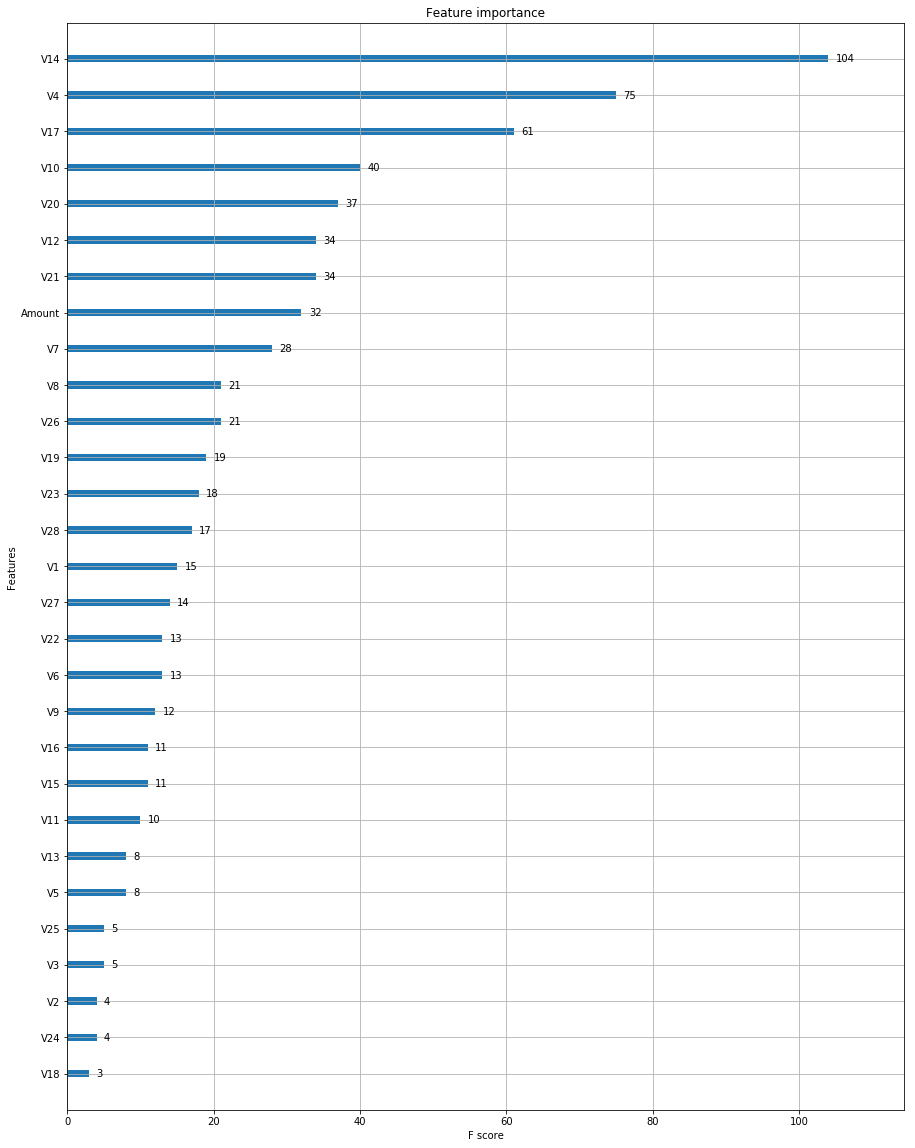

In [37]:


fig = plt.figure(figsize=(15,20),edgecolor='red')
ax1=fig.add_subplot(1,1,1,projection=None)
plot_importance(model,ax=ax1)
plt.show()


In [22]:
def imp_col(model,X,size):
    fimp=list(model.feature_importances_)
    features=list(X.columns)
    dic=dict(zip(features,fimp))
    d={}
    col_list=[]
    for i in dic.keys():
        if dic[i]>0.001:
       
            d[i]=dic[i]
    import operator
    d=sorted(d.items(),key=operator.itemgetter(1),reverse=True)
    columnss=list()
    for i in range(len(d)):
        columnss+=[d[i][0]]
    return columnss[:size]

In [23]:
columnss=imp_col(model,X_train,20)

In [24]:
X_train=X_train[columnss]
X_test=X_test[columnss]

In [ ]:
simple_classification(X_train,y_train,X_test,y_test)

In [25]:
X_train.shape

(199364, 20)

In [43]:
X_test.head()

,V14,V4,V17,V10,V20,V12,V21,Amount,V7,V8,V26,V19,V23,V28,V1,V27,V6,V22,V9,V15
183484,-1.802360,-0.607204,0.846606,-1.644401,0.186409,0.202647,-0.207098,40.00,1.159101,-0.124335,0.008297,0.847262,-0.261613,0.161139,-0.323334,0.108494,-0.091761,-0.433890,-0.174640,-0.247178
255448,-0.770837,-0.657071,0.492095,-1.192404,-0.096502,-0.620458,-0.271537,1.98,1.009985,-0.071069,0.134350,-0.148099,-0.030360,0.175562,-0.349718,0.076830,-0.733369,-0.833209,-0.302083,-0.108158
244749,0.348343,0.665520,-1.136766,-0.219013,0.419835,-0.736771,0.701399,96.00,-1.139049,0.329904,-1.041114,-1.578951,0.965054,0.437322,-1.614711,0.286285,-1.775367,1.134489,0.903813,0.041437
63919,0.278965,1.051019,0.116347,0.133040,-0.987790,0.435125,0.810408,308.00,0.510828,-0.243399,-0.177847,0.106228,0.150121,-0.660533,-2.477184,-0.510060,2.078384,0.692245,-0.260691,1.812232
11475,1.252202,-0.212383,1.878003,0.113386,-0.126871,-3.282511,-0.139436,5.00,-0.801403,-0.063672,-0.268706,0.263854,0.067055,0.003272,1.338831,-0.002769,-0.525744,-0.074719,0.997276,-0.868774


In [44]:
y_train.value_counts()

L    199019
S       345
Name: Class, dtype: int64

In [45]:
y_test.value_counts()

L    85296
S      147
Name: Class, dtype: int64

In [46]:
X_train_array=np.array(X_train)
X_test_array=np.array(X_test)


In [47]:
X_train_array.shape,X_test_array.shape

((199364, 20), (85443, 20))

In [58]:
#Logistic Regression with balanced class weights
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
def wieghtedlogreg_adaboost(X_train,y_train,X_test,y_test):
    clf_base =LogisticRegression() 
    grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight':['balanced']} 
    cv= KFold(n_splits=5,shuffle=True,random_state=0) 
    clf=GridSearchCV(clf_base, grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train,y_train)
    print('wieghtedlogreg')
    y_pred=clf.predict(X_test)
    ###y_pred_log_prob=clf.predict_prob(X_test)
    
    y_pred_on_train=clf.predict(X_train)
    print(classification_report(y_test,clf.predict(X_test))) 
    print(confusion_matrix(y_test,clf.predict(X_test)))
    print(confusion_matrix(y_train,clf.predict(X_train)))
    new_Xtrain=X_train[y_pred_on_train=='S']
    new_ytrain=y_train[y_pred_on_train=='S']
    new_Xtest=X_test[y_pred=='S']
    new_ytest=y_test[y_pred=='S']
    
    ###selected_rows=(y_pred=='S')
    model=XGBClassifier()
    model.fit(new_Xtrain,new_ytrain)
    fig = plt.figure(figsize=(15,20),edgecolor='red')
    ax1=fig.add_subplot(1,1,1,projection=None)
    plot_importance(model,ax=ax1)
    plt.show()
    columns=imp_col(model,new_Xtrain,10)
    new_Xtrain=new_Xtrain[columns]
    new_Xtest=new_Xtest[columns]
    
    
    ens=EasyEnsemble() 
    X_train_res1,y_train_res1= ens.fit_sample(new_Xtrain,new_ytrain) 
    print(X_train_res1.shape)
    y_pred_proba1=np.zeros(len(new_ytest)) 
    for idx in range(len(y_train_res1)): 
        clf_base=AdaBoostClassifier() 
        grid={'n_estimators':[10,50,100]} 
        cv =KFold(n_splits=5,shuffle=True,random_state=0)
        clf= GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
        clf.fit(X_train_res1[idx], y_train_res1[idx]) 
        y_pred_proba1+=clf.predict_proba(new_Xtest)[:,0]
    y_pred_proba1= y_pred_proba1/len(y_train_res1) 
    y_pred1=(y_pred_proba1>0.5).astype(int) 
    y_pred1= y_pred1.astype('str') 
    y_pred1[y_pred1=='1']='L' 
    y_pred1[y_pred1=='0']='S'
    ###y_pred_log_prob.iloc[selected_rows]=y
    print('Easy Ensemble')
    print(classification_report(new_ytest,y_pred1))
    print(confusion_matrix(new_ytest,y_pred1))
    
    print()

wieghtedlogreg
              precision    recall  f1-score   support

           L       1.00      0.98      0.99     85296
           S       0.06      0.91      0.11       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83216  2080]
 [   13   134]]
[[193937   5082]
 [    30    315]]


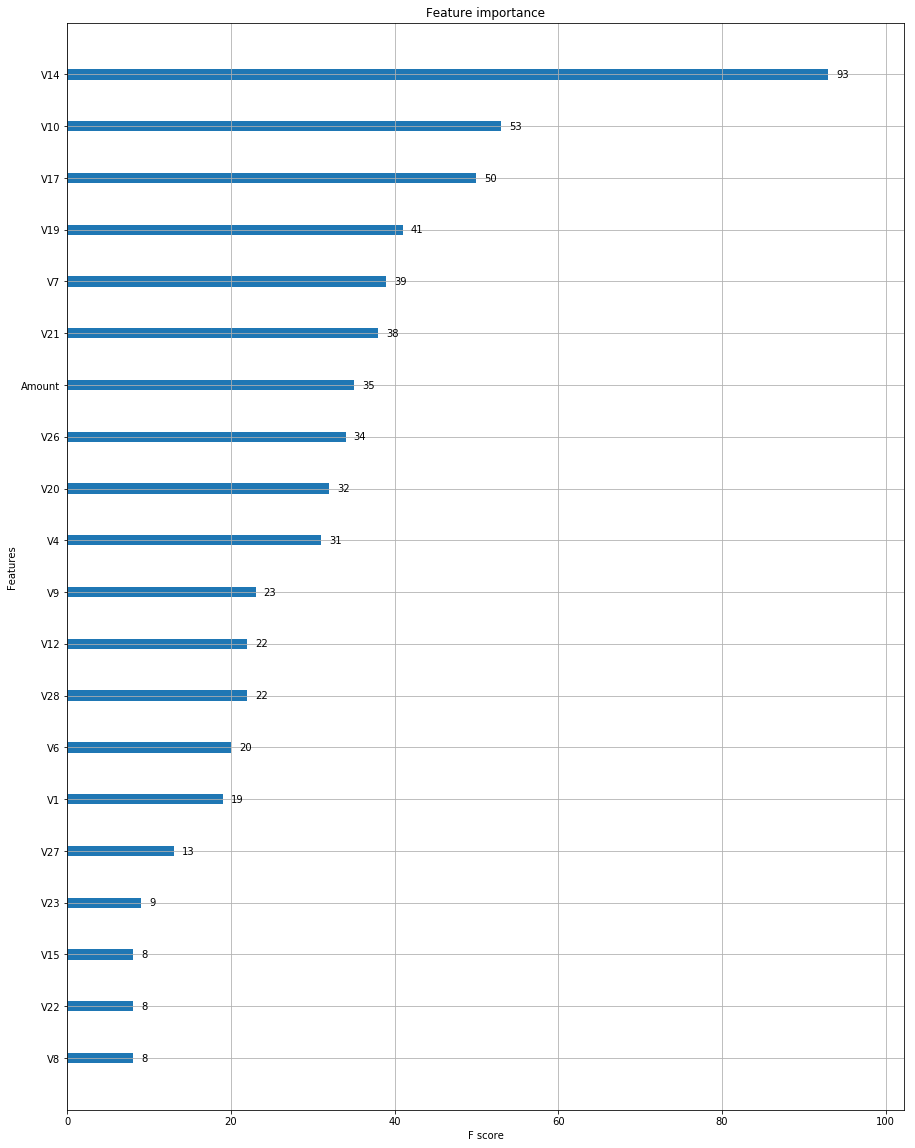

(10, 630, 10)
Easy Ensemble
              precision    recall  f1-score   support

           L       1.00      0.97      0.98      2080
           S       0.66      0.93      0.77       134

   micro avg       0.97      0.97      0.97      2214
   macro avg       0.83      0.95      0.88      2214
weighted avg       0.97      0.97      0.97      2214

[[2017   63]
 [  10  124]]



In [59]:
wieghtedlogreg_adaboost(X_train,y_train,X_test,y_test)

In [56]:
#Logistic Regression with balanced class weights
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import auc
def wieghtedlogreg_adaboost2(X_train,y_train,X_test,y_test):
    clf_base =LogisticRegression() 
    grid={'C':10.0**np.arange(-2,3), 'penalty':['l1','l2'], 'class_weight':['balanced']} 
    cv= KFold(n_splits=5,shuffle=True,random_state=0) 
    clf=GridSearchCV(clf_base, grid,cv=cv,n_jobs=8,scoring='f1_macro') 
    clf.fit(X_train,y_train)
    print('wieghtedlogreg')
    y_pred=clf.predict(X_test)
    ###y_pred_log_prob=clf.predict_prob(X_test)
    
    y_pred_on_train=clf.predict(X_train)
    print(classification_report(y_test,clf.predict(X_test))) 
    print(confusion_matrix(y_test,clf.predict(X_test)))
    print(confusion_matrix(y_train,clf.predict(X_train)))
    new_Xtrain=X_train[y_pred_on_train=='S']
    remaining_minority_in_Xtrain=X_train[y_train=='S']
    new_Xtrain=pd.concat([new_Xtrain,remaining_minority_in_Xtrain])
    
    new_ytrain=y_train[y_pred_on_train=='S']
    remaining_minority_in_y_train=y_train[y_train=='S']
    new_ytrain=pd.concat([new_ytrain,remaining_minority_in_y_train])
    
    new_Xtest=X_test[y_pred=='S']
    new_ytest=y_test[y_pred=='S']
    
    ###selected_rows=(y_pred=='S')
    model=XGBClassifier()
    model.fit(new_Xtrain,new_ytrain)
    fig = plt.figure(figsize=(15,20),edgecolor='red')
    ax1=fig.add_subplot(1,1,1,projection=None)
    plot_importance(model,ax=ax1)
    plt.show()
    columns=imp_col(model,new_Xtrain,10)
    new_Xtrain=new_Xtrain[columns]
    new_Xtest=new_Xtest[columns]
    
    
    ens=EasyEnsemble() 
    X_train_res1,y_train_res1= ens.fit_sample(new_Xtrain,new_ytrain) 
    print(X_train_res1.shape)
    y_pred_proba1=np.zeros(len(new_ytest)) 
    for idx in range(len(y_train_res1)): 
        clf_base=AdaBoostClassifier() 
        grid={'n_estimators':[10,50,100]} 
        cv =KFold(n_splits=5,shuffle=True,random_state=0)
        clf= GridSearchCV(clf_base,grid,cv=cv,n_jobs=8,scoring='f1_macro') 
        clf.fit(X_train_res1[idx], y_train_res1[idx]) 
        y_pred_proba1+=clf.predict_proba(new_Xtest)[:,0]
    y_pred_proba1= y_pred_proba1/len(y_train_res1) 
    y_pred1=(y_pred_proba1>0.5).astype(int) 
    y_pred1= y_pred1.astype('str') 
    y_pred1[y_pred1=='1']='L' 
    y_pred1[y_pred1=='0']='S'
    ###y_pred_log_prob.iloc[selected_rows]=y
    print('Easy Ensemble')
    print(classification_report(new_ytest,y_pred1))
    print(confusion_matrix(new_ytest,y_pred1))
    
    print()

wieghtedlogreg
              precision    recall  f1-score   support

           L       1.00      0.98      0.99     85296
           S       0.06      0.91      0.11       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.94      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83216  2080]
 [   13   134]]
[[193937   5082]
 [    30    315]]


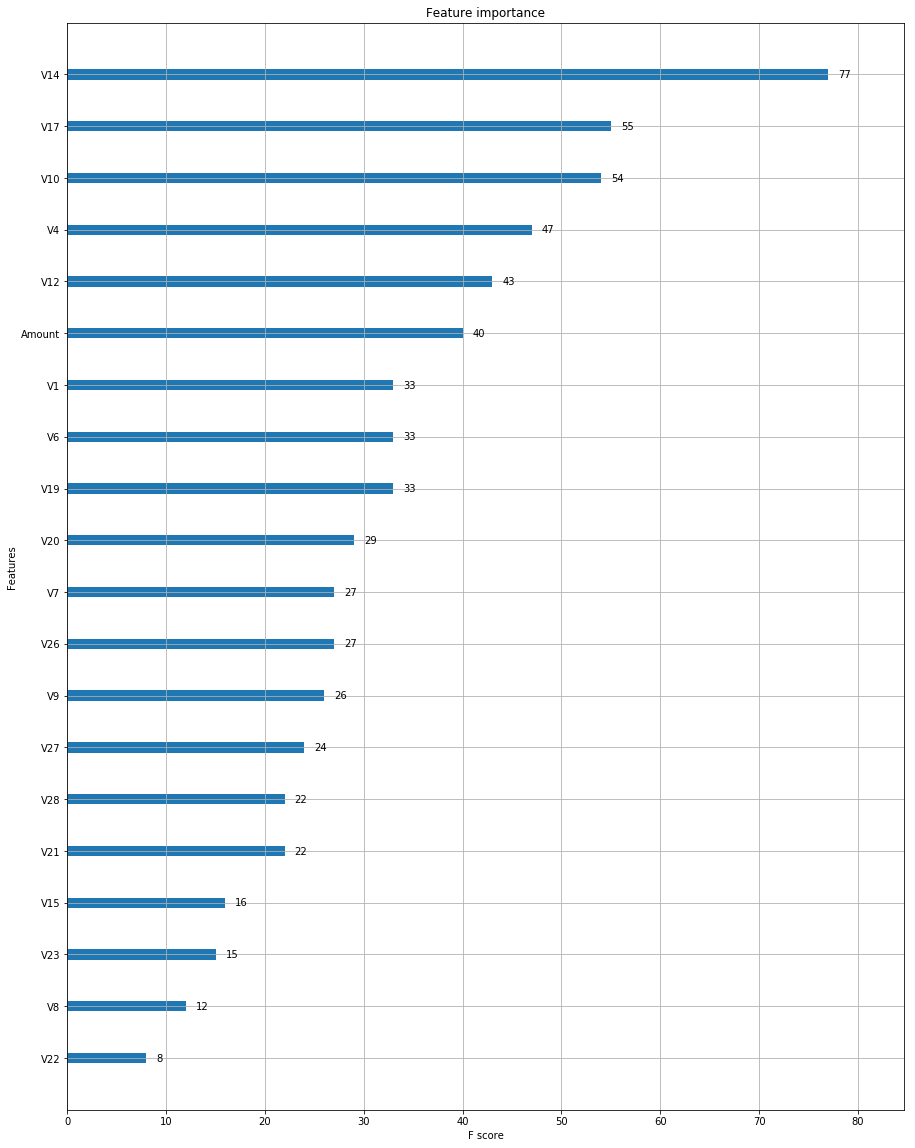

(10, 1320, 10)
Easy Ensemble
              precision    recall  f1-score   support

           L       0.99      0.97      0.98      2080
           S       0.64      0.91      0.75       134

   micro avg       0.96      0.96      0.96      2214
   macro avg       0.81      0.94      0.86      2214
weighted avg       0.97      0.96      0.97      2214

[[2010   70]
 [  12  122]]



In [57]:
wieghtedlogreg_adaboost2(X_train,y_train,X_test,y_test)

In [27]:
from imblearn.ensemble import BalancedBaggingClassifier
bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                 sampling_strategy='auto',
                                 replacement=False,
                                 random_state=0)
bbc.fit(X_train,y_train)
y_pred=bbc.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           L       1.00      0.98      0.99     85296
           S       0.06      0.88      0.11       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.98      0.99     85443

[[83256  2040]
 [   18   129]]


In [28]:
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=0)
brf.fit(X_train,y_train)
y_pred=brf.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           L       1.00      0.98      0.99     85296
           S       0.07      0.90      0.13       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.94      0.56     85443
weighted avg       1.00      0.98      0.99     85443

[[83605  1691]
 [   15   132]]


In [ ]:
Random_underSampling(X_train,y_train,X_test,y_test)
AdaBoost(X_train,y_train,X_test,y_test)


In [ ]:
X

In [153]:
BalanceCascade1(X_train_array,y_train,X_test_array,y_test)

Balance Cascade
              precision    recall  f1-score   support

           L       1.00      0.98      0.99     85296
           S       0.08      0.90      0.14       147

   micro avg       0.98      0.98      0.98     85443
   macro avg       0.54      0.94      0.57     85443
weighted avg       1.00      0.98      0.99     85443

[[83693  1603]
 [   15   132]]



# Creating ensemble of the important models

In [189]:
def ensemble1(X_train,y_train,X_test,y_test):
    result_random_unsampling=Random_underSampling(X_train,y_train,X_test,y_test)
    result_SMOTE_ENN=SMOTE_ENN(X_train,y_train,X_test,y_test)
    result_AdaBoost=AdaBoost(X_train,y_train,X_test,y_test)
    result_Random_OverSampling=Random_OverSampling(X_train,y_train,X_test,y_test)
    
    return result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost,

In [190]:
result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost=ensemble1(X_train,y_train,X_test,y_test)

Random_underSampling
Distribution of class labels before resampling Counter({'L': 199019, 'S': 345})
Distribution of class labels after resampling Counter({'L': 575, 'S': 345})
[[84345   951]
 [   20   127]]
              precision    recall  f1-score   support

           L       1.00      0.99      0.99     85296
           S       0.12      0.86      0.21       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443


SMOTE_ENN
Distribution of class labels before resamplingCounter({'L': 199019, 'S': 345})
Distribution of class labels after resampling Counter({'L': 198289, 'S': 139261})
              precision    recall  f1-score   support

           L       1.00      0.99      0.99     85296
           S       0.10      0.88      0.18       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.55      0.93      0.59     85443
weighted avg       1.

In [192]:
def create_numeric(result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost):
    result_Random_OverSampling[result_SMOTE_ENN=='L'] ='0'
    result_Random_OverSampling[result_SMOTE_ENN=='S'] ='1'
    
    result_random_unsampling[result_random_unsampling=='L'] ='0'
    result_random_unsampling[result_random_unsampling=='S'] ='1'
    
    result_SMOTE_ENN[result_SMOTE_ENN=='L'] ='0'
    result_SMOTE_ENN[result_SMOTE_ENN=='S'] ='1'
    
    result_AdaBoost[result_AdaBoost=='L'] ='0'
    result_AdaBoost[result_AdaBoost=='S'] ='1'
    return result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost
result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost=create_numeric(result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost)

In [193]:
def collective_result(result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost,y_test):
    ensemble_ypred=np.zeros(len(y_test)).astype('str')
    for i in range(len(result_random_unsampling)):
        if(int(result_Random_OverSampling[i])+int(result_random_unsampling[i])+int(result_SMOTE_ENN[i])+int(result_AdaBoost[i]))>=3:
            ensemble_ypred[i]='S'
        else:
            ensemble_ypred[i]='L'
    print(classification_report(y_test,ensemble_ypred))
    print(confusion_matrix(y_test,ensemble_ypred))
    return ensemble_ypred

In [194]:
ensemble_ypred=collective_result(result_Random_OverSampling,result_random_unsampling,result_SMOTE_ENN,result_AdaBoost,y_test)

              precision    recall  f1-score   support

           L       1.00      0.99      0.99     85296
           S       0.11      0.88      0.20       147

   micro avg       0.99      0.99      0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

[[84293  1003]
 [   18   129]]


In [ ]:
Step2_data=Xtest